# Singular Value Decomposition

#https://www.analyticsvidhya.com/blog/2019/08/5-applications-singular-value-decomposition-svd-data-science/

#https://github.com/KhyatiMahendru/

In [1]:
import pprint
import scipy
import scipy.linalg # SciPy Linear Algebra Library
import numpy as np



#A = scipy.array([ [4,4],[-3,3] ])
A = np.array([ [4,4],[-3,3] ])
U, S, V = scipy.linalg.svd(A)
V1 = np.transpose(V)
print("Orthogonal Matrix of AA':")
pprint.pprint(U)



print("Diagonal Matrix with singular Values:")
pprint.pprint(S)



print("Orthogonal Matrix of A'A:")
pprint.pprint(V)

Orthogonal Matrix of AA':
array([[-1.00000000e+00, -3.70074342e-18],
       [ 3.70074342e-18,  1.00000000e+00]])
Diagonal Matrix with singular Values:
array([5.65685425, 4.24264069])
Orthogonal Matrix of A'A:
array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])


# SVD for Image Compression

(638, 638) (638,) (960, 960)


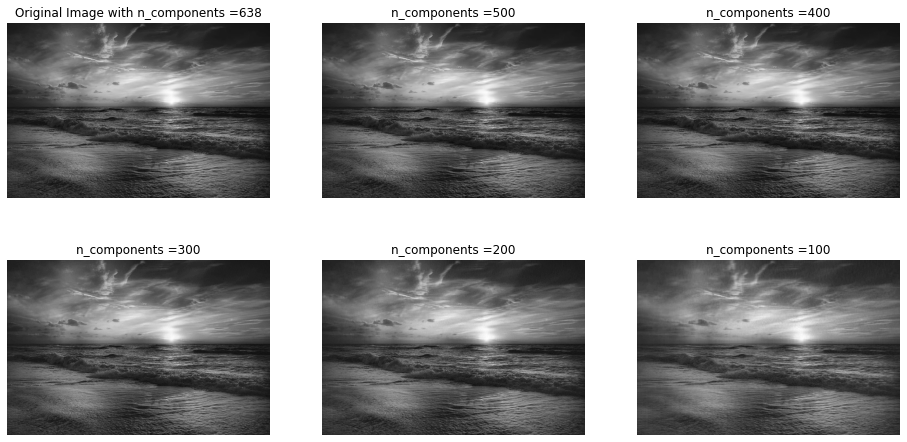

In [6]:
# get the image from "https://cdn.pixabay.com/photo/2017/03/27/16/50/beach-2179624_960_720.jpg"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

# read image in grayscale
img = cv2.imread('beach-2179624_960_720.jpg', 0)

# obtain svd
U, S, V = np.linalg.svd(img)

# inspect shapes of the matrices
print(U.shape, S.shape, V.shape)

# plot images with different number of components
comps = [638, 500, 400, 300, 200, 100]

plt.figure(figsize = (16, 8))
for i in range(6):
    low_rank = U[:, :comps[i]] @ np.diag(S[:comps[i]]) @ V[:comps[i], :]
    if(i  == 0):
        plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("Original Image with n_components =" + str(comps[i]))
    else:
        plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("n_components =" + str(comps[i]))

(638, 638) (638,) (960, 960)


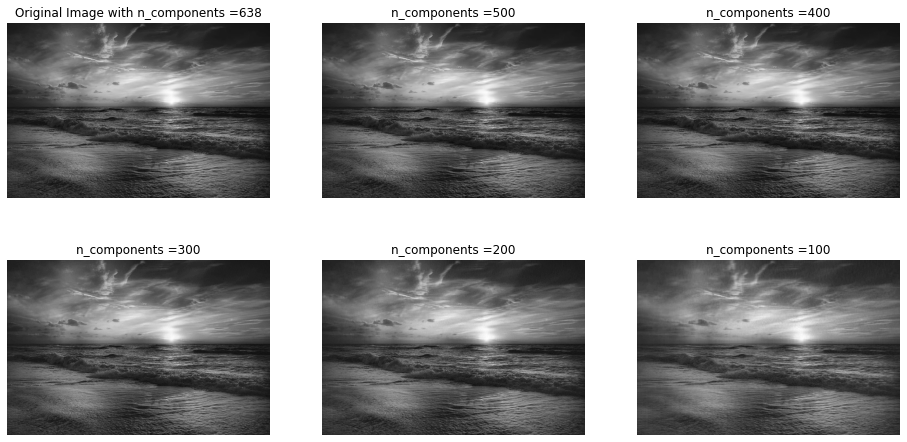

In [7]:
# obtain svd
U, S, V = np.linalg.svd(img)

# inspect shapes of the matrices
print(U.shape, S.shape, V.shape)

# plot images with different number of components
comps = [638, 500, 400, 300, 200, 100]

plt.figure(figsize = (16, 8))
for i in range(6):
    low_rank = U[:, :comps[i]] @ np.diag(S[:comps[i]]) @ V[:comps[i], :]
    if(i  == 0):
        plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("Original Image with n_components =" + str(comps[i]))
    else:
        plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("n_components =" + str(comps[i]))

In [ ]:
for i in range(6):
    low_rank = U[:, :comps[i]] @ np.diag(S[:comps[i]]) @ V[:comps[i], :]
    if(i  == 0):
        plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("Original Image with n_components =" + str(comps[i]))
    else:
        plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("n_components =" + str(comps[i]))

# SVD for Spectral Clustering

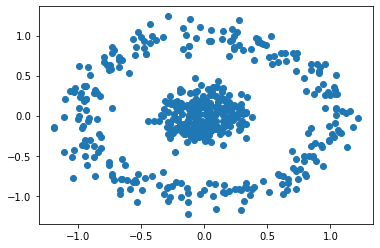

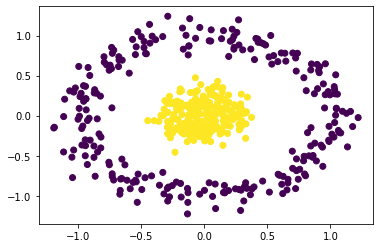

In [8]:
# import required functions and libraries
from sklearn.datasets import make_circles
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import SpectralClustering
#import numpy as np
#import matplotlib.pyplot as plt

# generate your data
X, labels = make_circles(n_samples=500, noise=0.1, factor=.2)

# plot your data
plt.scatter(X[:, 0], X[:, 1])
plt.show()

# train and predict
s_cluster = SpectralClustering(n_clusters = 2, eigen_solver='arpack',
        affinity="nearest_neighbors").fit_predict(X)
        
# plot clustered data
plt.scatter(X[:, 0], X[:, 1], c = s_cluster)
plt.show()

# SVD in NumPy

In [5]:
#import numpy as np
from numpy.linalg import svd

# define your matrix as a 2D numpy array
A = np.array([[4, 0], [3, -5]])

U, S, VT = svd(A)

print("Left Singular Vectors:")
print(U)
print("Singular Values:") 
print(np.diag(S))
print("Right Singular Vectors:") 
print(VT)

# check that this is an exact decomposition
# @ is used for matrix multiplication in Py3, use np.matmul with Py2
print(U @ np.diag(S) @ VT)

Left Singular Vectors:
[[-0.4472136  -0.89442719]
 [-0.89442719  0.4472136 ]]
Singular Values:
[[6.32455532 0.        ]
 [0.         3.16227766]]
Right Singular Vectors:
[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]
[[ 4.00000000e+00 -1.11022302e-15]
 [ 3.00000000e+00 -5.00000000e+00]]


# Truncated SVD in scikit-learn

In [6]:
#import numpy as np
from sklearn.decomposition import TruncatedSVD

A = np.array([[-1, 2, 0], [2, 0, -2], [0, -2, 1]])
print("Original Matrix:")
print(A)

svd =  TruncatedSVD(n_components = 2)
A_transf = svd.fit_transform(A)

print("Singular values:")
print(svd.singular_values_)

print("Transformed Matrix after reducing to 2 features:")
print(A_transf)

Original Matrix:
[[-1  2  0]
 [ 2  0 -2]
 [ 0 -2  1]]
Singular values:
[3. 3.]
Transformed Matrix after reducing to 2 features:
[[-1.23164545 -1.86629298]
 [ 2.73220976 -0.73145735]
 [-0.13445943  2.23202165]]


# Randomized SVD in scikit-learn

In [7]:
#import numpy as np
from sklearn.decomposition import TruncatedSVD

A = np.array([[-1, 2, 0], [2, 0, -2], [0, -2, 1]])
print("Original Matrix:")
print(A)

svd =  TruncatedSVD(n_components = 2)
A_transf = svd.fit_transform(A)

print("Singular values:")
print(svd.singular_values_)

print("Transformed Matrix after reducing to 2 features:")
print(A_transf)

Original Matrix:
[[-1  2  0]
 [ 2  0 -2]
 [ 0 -2  1]]
Singular values:
[3. 3.]
Transformed Matrix after reducing to 2 features:
[[-0.99877112 -2.00061397]
 [ 2.80024521 -0.39827976]
 [-0.40135148  2.19975385]]
